roadmap

abc analysis    
pareto diagram
volume forecasting

order picking methods, picking optimisation, routing strategies

In [1]:
import pandas as pd

In [2]:
order_df = pd.read_csv('datathon_order.csv', parse_dates=['Sipariş Tarihi'])
picking_df = pd.read_csv('datathon_picking.csv', index_col='Unnamed: 0', parse_dates=['Toplama Tarihi'])

C:\Users\IsmailKaraman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\IsmailKaraman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
order_df.shape

(508069, 9)

In [4]:
def convert_string_to_date(str_date):
    
    str_date = str(str_date)
    str_date = str_date.replace('/','')
    str_date = str_date.replace('.','')
    
    len_date = len(str_date)
    
    if len_date>7:
        return pd.Timestamp(int(str_date[4:]), int(str_date[2:4]), int(str_date[:2]))   
    elif len_date==7:
        return pd.Timestamp(int(str_date[3:]), int(str_date[1:3]), int(str_date[:1]))   
    elif len_date==6:
        return pd.Timestamp(int(str_date[2:]), int(str_date[1:2]), int(str_date[:1]))   

In [5]:
picking_df['Toplama Tarihi'] = picking_df['Toplama Tarihi'].apply(convert_string_to_date)
picking_df['Siparişin Düştüğü Tarih'] = picking_df['Siparişin Düştüğü Tarih'].apply(convert_string_to_date)
picking_df['Sevkiyat Tarihi'] = picking_df['Sevkiyat Tarihi'].apply(convert_string_to_date)

In [6]:
picking_df.head()

,Siparis No,Siparis Tipi,Urun Kodu,Toplanan Miktar,Toplama Tarihi,Toplama Saati,Siparişin Düştüğü Tarih,Sevkiyat Tarihi,Müşteri,Operasyon Numarası
0,72616784,10.0,61000058,45,2019-12-28,11:10,2019-12-26,2020-01-02,C10005,O1
1,72616784,10.0,61000058,45,2019-12-28,11:11,2019-12-26,2020-01-02,C10005,O1
2,72616784,10.0,61000058,45,2019-12-28,11:11,2019-12-26,2020-01-02,C10005,O1
3,72616784,10.0,61000058,45,2019-12-28,11:12,2019-12-26,2020-01-02,C10005,O1
4,72616784,10.0,61000058,45,2019-12-28,11:10,2019-12-26,2020-01-02,C10005,O1


<AxesSubplot:xlabel='Toplama Tarihi'>

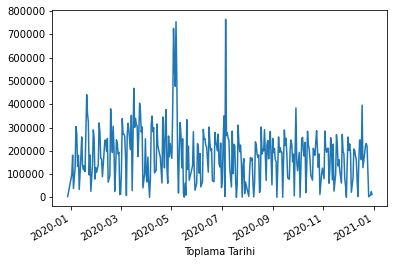

In [8]:
picking_df.groupby('Toplama Tarihi')['Toplanan Miktar'].sum().plot()

In [9]:
picking_df['Operasyon Numarası'].unique()

array(['O1', 'O2'], dtype=object)

In [65]:
picking_df['Siparis Tipi'].value_counts()

20.0    519118
40.0    142556
10.0     20337
30.0      2409
Name: Siparis Tipi, dtype: int64

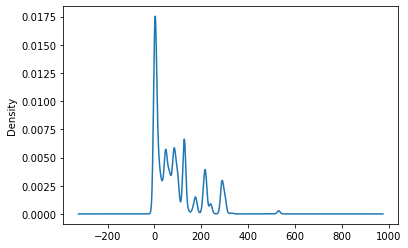

In [67]:
picking_df['Toplanan Miktar'].plot(kind='kde')

In [90]:
malzeme_volume_perc = order_df['Malzeme Numarası'].value_counts(normalize=True).reset_index()
malzeme_volume_perc.columns = ['malzeme', 'volume_percentage']
malzeme_volume_perc['cum_perc'] = malzeme_volume_perc['volume_percentage'].cumsum()

In [95]:
malzeme_volume_perc.loc[:,'ABC'] = 'C'
malzeme_volume_perc.loc[malzeme_volume_perc['cum_perc']<0.5,'ABC'] = 'B'
malzeme_volume_perc.loc[malzeme_volume_perc['cum_perc']<0.2,'ABC'] = 'A'

In [99]:
malzeme_volume_perc['ABC'].value_counts(normalize=True)

C    0.869888
B    0.097893
A    0.032218
Name: ABC, dtype: float64

In [24]:
pd.Timestamp(2011,3,20)

Timestamp('2011-03-20 00:00:00')

In [20]:
len('05/03/2020')

10

In [44]:
picking_df['Sevkiyat Tarihi'].unique()

array([2012020, 3012020, 4012020, 6012020, 7012020, 8012020, 9012020,
       10012020, 11012020, 13012020, 14012020, 15012020, 16012020,
       17012020, 18012020, 20012020, 21012020, 22012020, 23012020,
       24012020, 25012020, 27012020, 28012020, 29012020, 30012020,
       31012020, 1022020, 3022020, 4022020, 5022020, 6022020, 7022020,
       8022020, 10022020, 11022020, 12022020, 13022020, 14022020,
       15022020, 17022020, 18022020, 19022020, 20022020, 21022020,
       22022020, 24022020, 25022020, 26022020, 27022020, 28022020,
       29022020, 2032020, 3032020, 4032020, 5032020, 6032020, 7032020,
       9032020, 10032020, 11032020, 12032020, 13032020, 14032020,
       16032020, 17032020, 18032020, 19032020, 20032020, 21032020,
       23032020, 24032020, 25032020, 26032020, 27032020, 28032020,
       30032020, 31032020, 1042020, 2042020, 3042020, 4042020, 6042020,
       7042020, 8042020, 9042020, 10042020, 11042020, 13042020, 14042020,
       15042020, 16042020, 17042020, 1804

In [17]:
picking_df.dtypes

Siparis No                  object
Siparis Tipi               float64
Urun Kodu                   object
Toplanan Miktar              int64
Toplama Tarihi              object
Toplama Saati               object
Siparişin Düştüğü Tarih     object
Sevkiyat Tarihi             object
Müşteri                     object
Operasyon Numarası          object
dtype: object